In [1]:
#avg box testing, for new ensembles with mercator, on d03

#Simple code to identify a rectangular area of interest on the WRF grid, which can be used for further plotting and analysis

#analysis using this box present in other codes, here we are just checking the location

In [2]:
#Importing everything we may need
import subprocess
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import matplotlib.cbook as cbook
from matplotlib.colors import Normalize
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
from matplotlib.animation import PillowWriter
import os

import pandas as pd
import xarray as xr
import numpy as np
import math
from numpy import *
from pylab import *
import pygrib
import pyproj

from siphon.catalog import TDSCatalog
from siphon.http_util import session_manager
from datetime import datetime, timedelta
from xarray.backends import NetCDF4DataStore
from netCDF4 import Dataset
import metpy as metpy
import metpy.calc as mpcalc
from metpy.plots import ctables
from metpy.units import units
from metpy.plots import add_metpy_logo, add_timestamp
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import scipy.ndimage as ndimage
from scipy.ndimage import gaussian_filter

import cartopy.crs as crs
from cartopy.feature import NaturalEarthFeature
from cartopy import config
import wrf
from wrf import (to_np, interplevel, geo_bounds, getvar, ll_to_xy, ll_to_xy_proj, smooth2d, get_cartopy, cartopy_xlim,
                 cartopy_ylim, latlon_coords)
import glob

In [3]:
file= xr.open_dataset("/scratch/amanda/ivan_ensembles/ens1_ivan/hourly_d03_2004-09-13_17:00:00")

lat = file.variables['XLAT'][0,:,:]
lon = file.variables['XLONG'][0,:,:]
rain_nc = file.variables['RAINNC'][0,:,:]
rain_c = file.variables['RAINC'][0,:,:]

raintot = rain_nc + rain_c

print(np.shape(lat))

(630, 468)


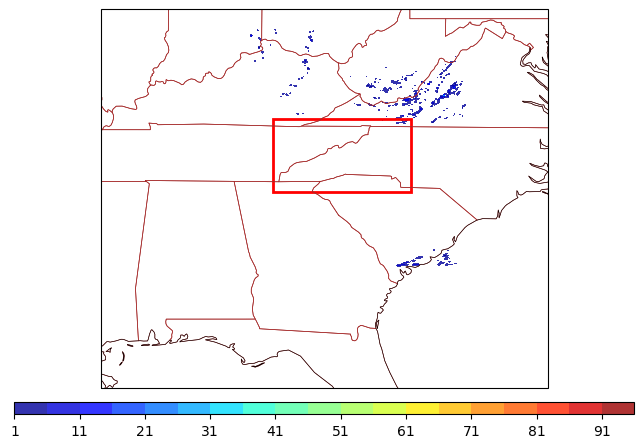

In [11]:
#plot

fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_extent([-89.5, -76.5, 29, 40],crs.PlateCarree())
ax.add_feature(cfeature.STATES.with_scale('50m'), linewidth=0.5, edgecolor='brown')
ax.coastlines('50m', linewidth=0.4)

rain_contours = np.arange(0,100,5)

# Plot contour data 
rain_contours = np.arange(1, 100, 5)
runoff_contours = ax.contourf(lon, lat, raintot, levels=np.arange(1, 100, 5), cmap='jet', alpha=0.8, transform=ccrs.PlateCarree())
plt.colorbar(runoff_contours, ax=ax, orientation='horizontal', pad=0.03, shrink=0.8, aspect=50)

# Define the corner points of the box (lat, lon)
box_top_left = (36.8, -84.5)
box_bottom_right = (34.7, -80.5)

# Create a rectangle patch and add it to the plot
box = Rectangle((box_top_left[1], box_bottom_right[0]), box_bottom_right[1] - box_top_left[1], box_top_left[0] - box_bottom_right[0], fill=False, edgecolor='red', linewidth=2)
ax.add_patch(box)

plt.show()


